In [30]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('data/train2.csv',index_col=0)
data_test = pd.read_csv('data/test2.csv',index_col=0)

In [3]:
print('Size train',data_train.shape)
print('Size test',data_test.shape)

Size train (76020, 370)
Size test (75818, 369)


In [4]:
print('Class_Labels ',data_train['TARGET'].unique())


Class_Labels  [0 1]


In [95]:
total_ones=data_train['TARGET'].sum()
total_zeros =data_train.shape[0]-total_ones
print('Number of Ones:',total_ones)
print('Number of Zeros:',total_zeros)
#null_values = data_train.isnull().sum().sum()
print('Is there NaN values? ',data_train.isnull().any().any())
list_cols_no_label = [item for item in data_train.columns.values.tolist() if item!='TARGET']
data_train_no_label = data_train.loc[:,list_cols_no_label]
duplicates = data_train_no_label.duplicated().sum()
print('Number of duplicates :',duplicates)
cols_numeric = data_train._get_numeric_data().columns
cols_categorical = list(set(data_train.columns) - set(cols_numeric))
print('Number of categorical variables', len(cols_categorical))

Number of Ones: 3008
Number of Zeros: 73012
0
Is there NaN values?  False
Number of duplicates : 4940
Number of categorical variables 0


In [6]:
data_train_happy=data_train.loc[data_train['TARGET']==0]
print('Size happy:',data_train_happy.shape)
data_train_unhappy=data_train.loc[data_train['TARGET']==1]
print('Size unhappy:',data_train_unhappy.shape)

Size happy: (73012, 370)
Size unhappy: (3008, 370)


In [7]:
data_train_happy_no_label = data_train_happy.loc[:,list_cols_no_label]
duplicates_happy = data_train_happy_no_label.duplicated().sum()
print('Number of duplicates for happy :',duplicates_happy)

Number of duplicates for happy : 4614


In [8]:
data_train_unhappy_no_label = data_train_unhappy.loc[:,list_cols_no_label]
duplicates_unhappy = data_train_unhappy_no_label.duplicated().sum()
print('Number of duplicates for unhappy :',duplicates_unhappy)

Number of duplicates for unhappy : 193


In [96]:
print('Descriptive Stats columns\n')
data_train_stats=data_train.describe(include='all')
data_train_stats.head()

Descriptive Stats columns



,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,...,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000,76020.0000
mean,-1523.1993,33.2129,86.2083,72.3631,119.5296,3.5591,6.4727,0.4129,0.5674,3.1607,...,7.9358,1.3651,12.2156,8.7841,31.5053,1.8586,76.0262,56.6144,117235.8094,0.0396
std,39033.4624,12.9565,1614.7573,339.3158,546.2663,93.1557,153.7371,30.6049,36.5135,95.2682,...,455.8872,113.9596,783.2074,538.4392,2013.1254,147.7866,4040.3378,2852.5794,182664.5985,0.1949
min,-999999.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5163.7500,0.0000
25%,2.0000,23.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,67870.6125,0.0000


In [97]:
data_train_unique_values=data_train_no_label.apply(pd.Series.nunique)
print('Number Unique values\n'),
data_train_unique_values.head()

Number Unique values



var3                        208
var15                       100
imp_ent_var16_ult1          596
imp_op_var39_comer_ult1    7551
imp_op_var39_comer_ult3    9099
dtype: int64

In [11]:
print('Number of Features with constant values over all data\n',data_train_unique_values.where(data_train_unique_values==1,other=0).sum())

Number of Features with constant values over all data
 34


In [78]:
series_col_unique_value = data_train_unique_values.where(data_train_unique_values==1,other=0)
list_attributes_one_value = series_col_unique_value[series_col_unique_value==1].index.tolist()
print(list_attributes_one_value)

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [93]:
check=data_train.loc[:,['num_reemb_var13_hace3','num_var28_0', 'num_var28']].as_matrix()
print('Check dim',check.shape)
print('Check values',sum(check))

Check dim (76020, 3)
Check values [0 0 0]


In [81]:
print('Number of Features with binary values over all data\n',data_train_unique_values.where(data_train_unique_values==2,other=0).sum()/2)

Number of Features with binary values over all data
 105.0


In [84]:
series_col_binary_value = data_train_unique_values.where(data_train_unique_values==2,other=0)
list_attributes_binary_value = series_col_binary_value[series_col_binary_value==2].index.tolist()
print(list_attributes_binary_value)

['ind_var1_0', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var37_cte', 'ind_var37_0', 'ind_var37', 'ind_var39_0', 'ind_var40_0', 'ind_var40', 'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var6_0', 'num_var6', 'num_var8', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 'num_var20_0', 'num_var20', 'num_var29_0'

In [44]:
data_train_happy=data_train.loc[data_train['TARGET']==0]
print('Size happy:',data_train_happy.shape)
data_train_unhappy=data_train.loc[data_train['TARGET']==1]
print('Size unhappy:',data_train_unhappy.shape)

Size happy: (73012, 370)
Size unhappy: (3008, 370)


In [48]:
s_perc = 0.5
data_train_unhappy_s = data_train_unhappy.sample(int(s_perc*data_train_unhappy.shape[0]),random_state=21)
data_train_happy_s= data_train_happy.sample(data_train_unhappy_s.shape[0],random_state=32)
print('Size happy sample :',data_train_happy_s.shape)
print('Size unhappy sample :',data_train_unhappy_s.shape)

Size happy sample : (1504, 370)
Size unhappy sample : (1504, 370)


In [50]:
data_train_sample_homogenous = pd.concat([data_train_happy_s,data_train_unhappy_s])
print('Size train sampled same numbers of instances for classes :',data_train_sample_homogenous.shape)

Size train sampled same numbers of instances for classes : (3008, 370)


In [51]:
from sklearn.metrics.pairwise import pairwise_distances
matrix_data=data_train_sample_homogenous.as_matrix()
distance_matrix = pairwise_distances(matrix_data,metric='cosine')

In [52]:
print(distance_matrix)
np.savetxt('data/distance_matrix.txt',distance_matrix)

[[0.00000000e+00 6.95364768e-01 6.93101855e-01 ... 6.95365080e-01
  6.95368015e-01 6.95365957e-01]
 [6.95364768e-01 0.00000000e+00 4.43616382e-05 ... 5.15818824e-07
  8.99111807e-06 2.81803496e-06]
 [6.93101855e-01 4.43616382e-05 0.00000000e+00 ... 4.50373451e-05
  5.29820334e-05 4.73013904e-05]
 ...
 [6.95365080e-01 5.15818824e-07 4.50373451e-05 ... 0.00000000e+00
  5.29069319e-06 9.31686000e-07]
 [6.95368015e-01 8.99111807e-06 5.29820334e-05 ... 5.29069319e-06
  0.00000000e+00 1.81918668e-06]
 [6.95365957e-01 2.81803496e-06 4.73013904e-05 ... 9.31686000e-07
  1.81918668e-06 0.00000000e+00]]


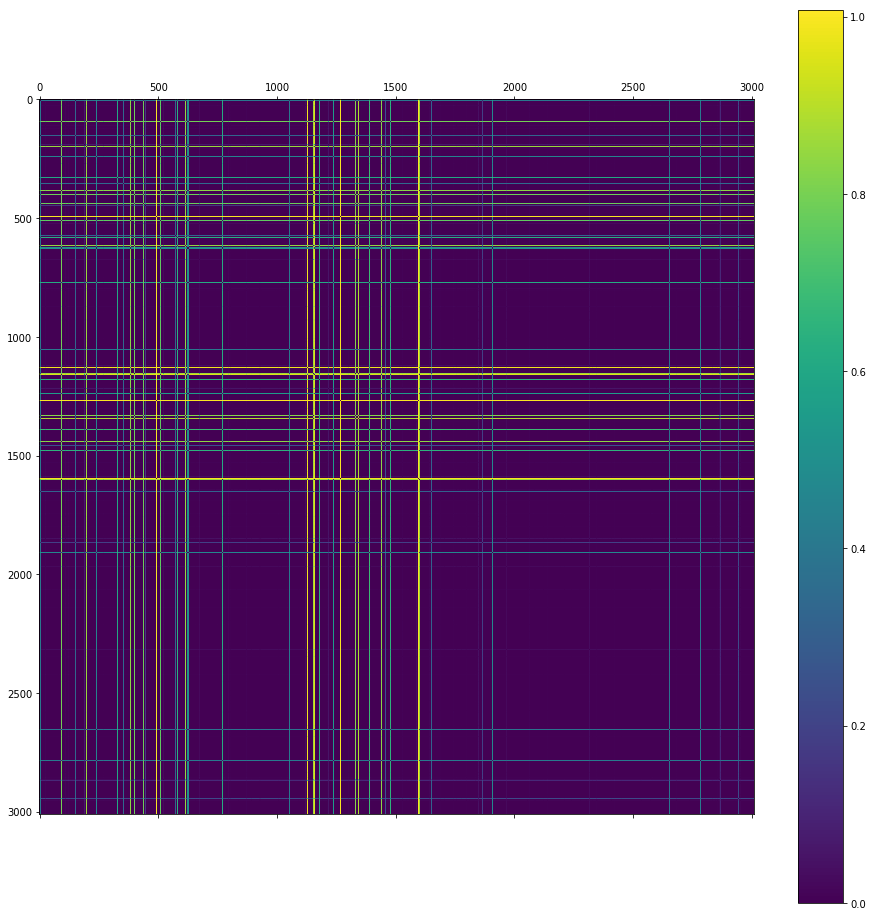

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (400,400)
plt.matshow(distance_matrix)
plt.colorbar()
plt.show()

there are more differences in happy rather unhappy

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score

number_rounds = 10
test_size_value = 0.5
number_trees = 100

matrix_feature = matrix_data[:,:-1]
labels = matrix_data[:,-1]


# I am using an initial setting a this stage, then I will do a fine 
# tunning of the parameters.
classifier = RandomForestClassifier(n_estimators=number_trees, 
                                    max_features="sqrt")

f1_score_list = []
cm_list = []
cm_max_list = []

rounds = StratifiedShuffleSplit(n_splits=number_rounds, 
                                test_size=test_size_value,
                                random_state=0)

for train_index, test_index in rounds.split(matrix_feature,labels):
        matrix_train = matrix_feature[train_index]
        classes_train = labels[train_index]
        matrix_test = matrix_feature[test_index]
        classes_test = labels[test_index]
        classifier.fit(matrix_train,classes_train)
        classes_predicted = classifier.predict(matrix_test)
        cm = confusion_matrix(classes_test, classes_predicted,labels=[0,1])
        # normalize the confusion matrix
        cm= cm / cm.astype(np.float).sum(axis=1).reshape(-1,1)
        #this threshold is used for plotting 
        thresh = cm.max() / 2.
        cm_list.append(cm)
        cm_max_list.append(thresh)
        #I compute the score taking into account the weighted schema, 
        #which means weighted by the support (the number of true instances for each label)
        precision, recall, fscore, support = score(classes_test, 
                                                   classes_predicted,
                                                   average='weighted')
        f1_score_list.append(fscore)



In [102]:
#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

F1 accuracy: 0.728 (+/- 0.013)


In [103]:
import pandas as pd
from sklearn.utils import shuffle
print('Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: ')
shuffle(cm_list,random_state=15)
cnf_matrix = cm_list[0]
dataframe=pd.DataFrame(cnf_matrix,index=['Real happy',' Real unhappy'],columns=['Predicted happy',' Predicted unhappy'])
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(dataframe)

Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: 
               Predicted happy   Predicted unhappy
Real happy              0.7580              0.2420
 Real unhappy           0.2819              0.7181


unhappy are more confused to happy, it could be becouse happy space is more complex so than unhappy as in the distance matrix

Strategy
* Remove Constant Feature
* Separte Binary Feature
* Undestand Impact of the Numerical Feature (Borega)
* Understand Impact Activation of Binary Feature (Activation Diagram or Clustering)
* Include Eventualy Clustering Memberships from Binary Feature in the Numnerical Feature
* Outlier in the happy spaces
* Normalize the values of Numberical Feature if outside quartile
